In [88]:
import pandas as pd
import seaborn as sns
import pylab as plt
import numpy as np
import nibabel as nb
from nilearn.plotting import plot_glass_brain, plot_stat_map, plot_roi
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
df = pd.read_csv("smoothness_and_volume.csv", index_col=0)

evaluating map 2819
evaluating fake map 60


(-4, 4)

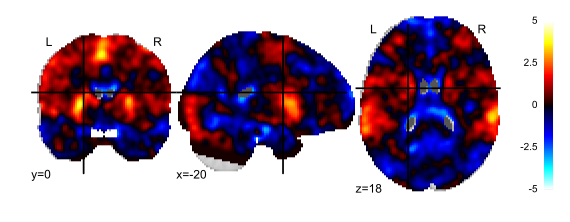

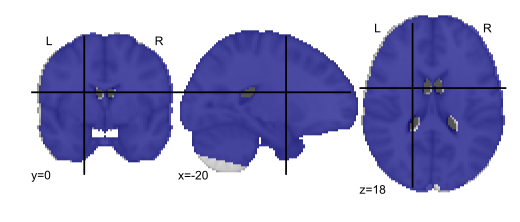

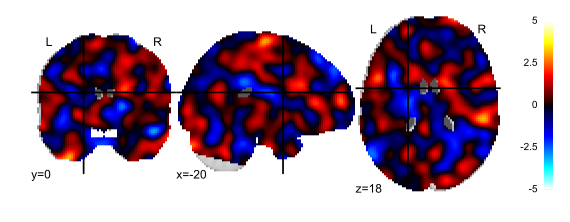

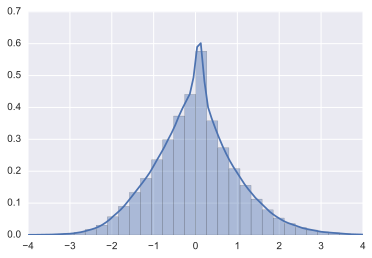

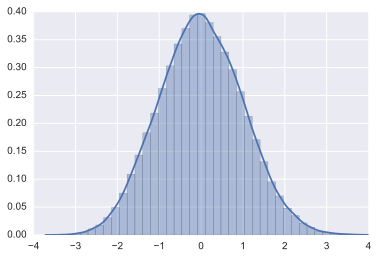

In [93]:
random_image_id = np.random.choice(df.index)
print "evaluating map %d"%random_image_id

map_nii = nb.load("images/resampled/%04d.nii.gz"%random_image_id)
mask_nii = nb.load("images/resampled_masks/%04d.nii.gz"%random_image_id)

plot_stat_map(map_nii, threshold=0, colorbar=True, cut_coords=[-20, 0, 18], vmax=5)
plot_roi(mask_nii, cut_coords=[-20, 0, 18])

random_fake_image_id = np.random.choice(range(200))
print "evaluating fake map %d"%random_fake_image_id
fake_map_nii = nb.load("images/fake_maps/%04d/%04d.nii.gz"%(random_image_id, random_fake_image_id))
plot_stat_map(fake_map_nii, threshold=0, colorbar=True, cut_coords=[-20, 0, 18], vmax=5)

plt.figure()
sns.distplot(map_nii.get_data()[mask_nii.get_data()==True], bins = 40)
plt.xlim([-4, 4])
plt.figure()
sns.distplot(fake_map_nii.get_data()[mask_nii.get_data()==True], bins=40)
plt.xlim([-4, 4])

In [69]:
for image_id in [2744]:#df.index:
    FWHMx_mms = []
    FWHMy_mms = []
    FWHMz_mms = []
    print "image_id = " + str(image_id)
    for fake_image_id in range(200):
        output = !smoothest -z images/fake_maps/{"%04d"%image_id}/{"%04d"%fake_image_id}.nii.gz -m images/resampled_masks/{"%04d"%image_id}.nii.gz -V
        FWHMx_mm, FWHMy_mm, FWHMz_mm = [float(val[len("FWHMx = "):-3])  for val in output[-7].split(", ")]
        FWHMx_mms.append(FWHMx_mm)
        FWHMy_mms.append(FWHMy_mm)
        FWHMz_mms.append(FWHMz_mm)
    print "original - fake (x) = %g"%(df[df.index==image_id].FWHMx_mm - np.array(FWHMx_mms).mean())
    print "original - fake (y) = %g"%(df[df.index==image_id].FWHMy_mm - np.array(FWHMy_mms).mean())
    print "original - fake (z) = %g\n"%(df[df.index==image_id].FWHMz_mm - np.array(FWHMz_mms).mean())

image_id = 2744
original - fake (x) = 0.0027035
original - fake (y) = 0.0563655
original - fake (z) = -0.001722



In [57]:
!smoothest -z images/fake_maps/0564/0000.nii.gz -m images/resampled_masks/0564.nii.gz -V

verbose = 1
help = 0
dof = 100
maskname = images/resampled_masks/0564.nii.gz
residname = res4d
zstatname = images/fake_maps/0564/0000.nii.gz
Reading mask....done
mask:: Size = (91,109,91)
mask:: ROI Size = (91,109,91)
mask:: Dims = (2,2,2)
mask:: Minimum and maximum intensities are: 0 and 1
Reading datafile....done
Data (residuals/zstat):: Size = (91,109,91,1)
Data (residuals/zstat):: ROI Size = (91,109,91,1)
Data (residuals/zstat):: Dims = (2,2,2,1)
Data (residuals/zstat):: Minimum and maximum intensities are: nan and nan
Standardising....done
Masked-in voxels = 190626
SSminus[X] = 175304, SSminus[Y] = 177177, SSminus[Z] = 174396, S2[X] = 178836, S2[Y] = 180221, S2[Z] = 180306
DLH 0.00951873 voxels^-3 before correcting for temporal DOF
FWHMx = 8.33639 voxels, FWHMy = 9.02082 voxels, FWHMz = 6.44948 voxels
FWHMx = 16.6728 mm, FWHMy = 18.0416 mm, FWHMz = 12.899 mm
DLH 0.00951873 voxels^-3
VOLUME 190626 voxels
RESELS 485.008 voxels per resel
DLH 0.00951873
VOLUME 190626
RESELS 485.008


In [41]:
ls -al images/fake_maps/0564/

total 292800
drwxr-xr-x  202 filo  staff    6868 Jan  5 21:08 ./
drwxr-xr-x  410 filo  staff   13940 Jan  5 21:40 ../
-rw-r--r--    1 filo  staff  747387 Jan  5 21:07 0000.nii.gz
-rw-r--r--    1 filo  staff  747387 Jan  5 21:07 0001.nii.gz
-rw-r--r--    1 filo  staff  747387 Jan  5 21:07 0002.nii.gz
-rw-r--r--    1 filo  staff  747387 Jan  5 21:07 0003.nii.gz
-rw-r--r--    1 filo  staff  746698 Jan  5 21:07 0004.nii.gz
-rw-r--r--    1 filo  staff  746698 Jan  5 21:07 0005.nii.gz
-rw-r--r--    1 filo  staff  746698 Jan  5 21:07 0006.nii.gz
-rw-r--r--    1 filo  staff  746698 Jan  5 21:07 0007.nii.gz
-rw-r--r--    1 filo  staff  747513 Jan  5 21:07 0008.nii.gz
-rw-r--r--    1 filo  staff  747513 Jan  5 21:07 0009.nii.gz
-rw-r--r--    1 filo  staff  747513 Jan  5 21:07 0010.nii.gz
-rw-r--r--    1 filo  staff  747513 Jan  5 21:07 0011.nii.gz
-rw-r--r--    1 filo  staff  747598 Jan  5 21:07 0012.nii.gz
-rw-r--r--    1 filo  staff  747598 Jan  5 21:07 0013.nii.gz
-rw-r--r--    1 filo  staff 

In [44]:
df[df.index == 564]

,FWHMx_mm,FWHMy_mm,FWHMz_mm,volume_vox
564,19.3934,20.3302,15.624,190626
